
Simulated Population Data:


,disease:,no_disease:,total:
exposed:,171,370,541
nonexposed:,1379,4095,5474
total:,1550,4465,6015




True Odds Ratio: 1.3724104815475373



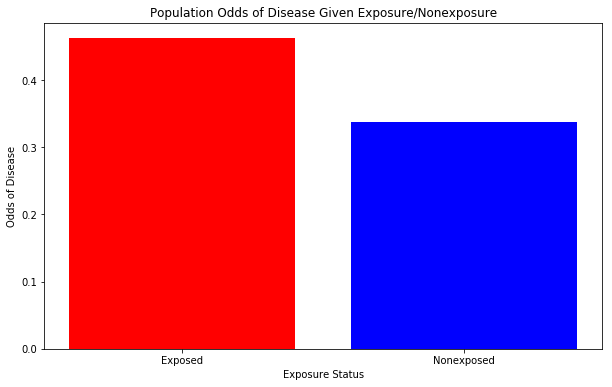

,exposed_disease,exposed_no_disease,nonexposed_disease,nonexposed_no_disease,sample_size,odds_ratio,log_odds_ratio,var_log_odds_ratio,ub_ci_log_odds_ratio,lb_ci_log_odds_ratio,weight
study number:,,,,,,,,,,,
0,22.0,40.0,106.0,300.0,468.0,1.556604,0.442506,0.083222,1.007931,-0.122918,12.016076
1,7.0,4.0,44.0,121.0,176.0,4.812500,1.571217,0.423849,2.847249,0.295185,2.359331
2,1.0,6.0,15.0,37.0,59.0,0.411111,-0.888892,1.260360,1.311517,-3.089301,0.793424
3,7.0,21.0,71.0,239.0,338.0,1.122066,0.115171,0.208745,1.010668,-0.780325,4.790539
4,17.0,27.0,98.0,315.0,457.0,2.023810,0.704982,0.109239,1.352788,0.057175,9.154219
5,24.0,40.0,178.0,530.0,772.0,1.786517,0.580268,0.074171,1.114063,0.046473,13.482279
6,25.0,36.0,168.0,512.0,741.0,2.116402,0.749718,0.075683,1.288925,0.210510,13.212957
7,0.5,3.0,10.0,27.0,40.5,0.450000,-0.798508,2.470370,2.282105,-3.879120,0.404798
8,9.0,20.0,65.0,157.0,251.0,1.086923,0.083351,0.182865,0.921500,-0.754799,5.468510


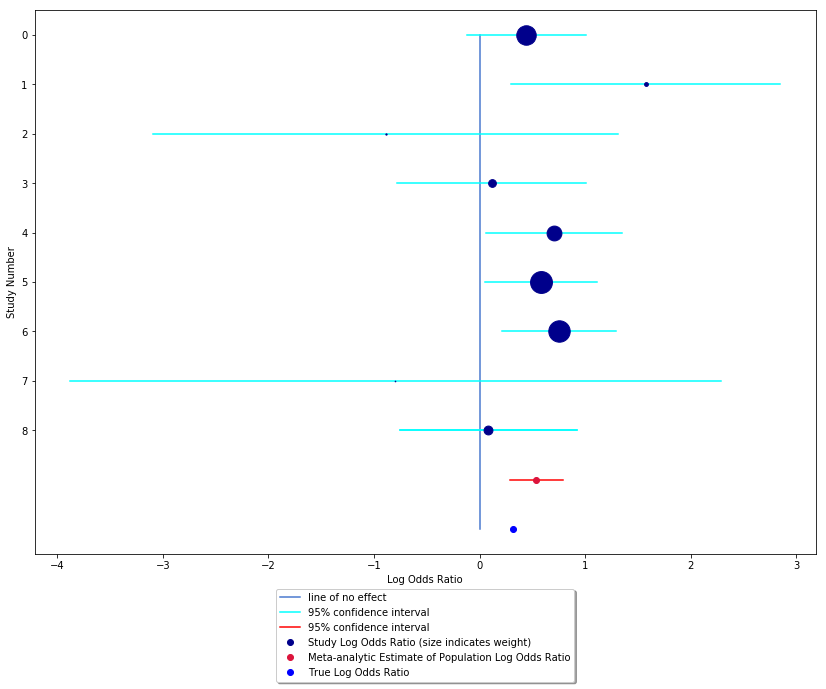

Z statistic of summary effect estimate =  4.225487428838335
p =  2.384241354569383e-05


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats

plt.style.use('seaborn-muted')

# simulating a population, with a proportion of the population exposed to a hazard

population = np.array([])

population_size = np.random.randint(1000,8000)

p_exposed = np.random.uniform(high =0.3)

exposure_danger = np.random.uniform(low =0.2, high = 0.4)

disease_general = np.random.uniform(high = exposure_danger)

# probabilistically assigning a disease status to each member of the population, where the probability of having the 
# disease changes conditionally on exposure status
for i in np.arange(population_size):
    exposed_or_not = np.random.choice(['exposed','nonexposed'], p = [p_exposed, 1-p_exposed])
    if exposed_or_not == 'exposed':
        population = np.append(population, np.random.choice(['exposed_disease','exposed_no_disease'], 
                                           p=[exposure_danger,1-exposure_danger]))
    if exposed_or_not == 'nonexposed':
        population = np.append(population, np.random.choice(['nonexposed_disease','nonexposed_no_disease'],
                          p=[disease_general,1-disease_general]))

    
# creating counts based on exposure and disease status
population_n = len(population)

nonexposed_no_disease = np.count_nonzero(population == 'nonexposed_no_disease')

nonexposed_disease = np.count_nonzero(population == 'nonexposed_disease')

number_nonexposed = nonexposed_no_disease + nonexposed_disease

exposed_no_disease = np.count_nonzero(population == 'exposed_no_disease')

exposed_disease = np.count_nonzero(population == 'exposed_disease')

number_exposed = exposed_no_disease + exposed_disease

total_disease = nonexposed_disease + exposed_disease

df_pop = pd.DataFrame(index = ['exposed:','nonexposed:', 'total:'], columns = ['disease:','no_disease:', 'total:'])


df_pop.loc['exposed:', 'disease:'] = exposed_disease
df_pop.loc['exposed:', 'no_disease:'] = exposed_no_disease
df_pop.loc['exposed:', 'total:']  = exposed_disease + exposed_no_disease
df_pop.loc['nonexposed:', 'disease:']= nonexposed_disease
df_pop.loc['nonexposed:', 'no_disease:'] = nonexposed_no_disease
df_pop.loc['nonexposed:', 'total:'] = nonexposed_disease + nonexposed_no_disease
df_pop.loc['total:', 'disease:'] = exposed_disease + nonexposed_disease
df_pop.loc['total:', 'no_disease:'] = exposed_no_disease + nonexposed_no_disease 
df_pop.loc['total:', 'total:'] = population_n

# correcting 0 counts (if there are any) so the odds ratio is defined
if df_pop.iloc[0,0] == 0:
    df_pop.iloc[0,0] = 0.5
    
if df_pop.iloc[0,1] == 0:
    df_pop.iloc[0,1] = 0.5

if df_pop.iloc[1,0] == 0:
    df_pop.iloc[1,0] = 0.5
    
if df_pop.iloc[1,1] == 0:
    df_pop.iloc[1,1] = 0.5

print('\nSimulated Population Data:')
display(df_pop)
print()


# calculating the population effect size

odds_disease_giv_exposure = exposed_disease/exposed_no_disease

odds_disease_giv_nonexposure = nonexposed_disease/nonexposed_no_disease

true_odds_ratio = odds_disease_giv_exposure/odds_disease_giv_nonexposure

true_log_odds_ratio = np.log(true_odds_ratio)

    
print()
print('True Odds Ratio:', true_odds_ratio)
print()

# plotting the population of odds of disease given exposure status
plt.figure(figsize = (10,6))
plt.bar(x = ['Exposed', 'Nonexposed'], height = [odds_disease_giv_exposure, odds_disease_giv_nonexposure]
       , color = ['red', 'blue'])
plt.xlabel('Exposure Status')
plt.ylabel('Odds of Disease')
plt.title('Population Odds of Disease Given Exposure/Nonexposure')
plt.show()

# simulating studies for an inverse-variance fixed effect meta-analysis

no_of_studies = np.random.randint(5,40)

studies = []

for i in np.arange(no_of_studies):
    sample_size = np.random.randint(10,800)
    study = np.random.choice(population, size = sample_size, replace = False)
    studies.append(study)
    
counts = np.array([])


# creating a dataframe for the study counts

df = pd.DataFrame(columns = ['exposed_disease', 'exposed_no_disease',
                                             'nonexposed_disease','nonexposed_no_disease'])

# creating counts for disease status and exposure status within each study

for i in studies:
    temp_exposed_disease = np.count_nonzero(i == 'exposed_disease')
    temp_exposed_no_disease = np.count_nonzero(i == 'exposed_no_disease')
    temp_nonexposed_disease = np.count_nonzero(i == 'nonexposed_disease')
    temp_nonexposed_no_disease = np.count_nonzero(i == 'nonexposed_no_disease')
    study = [temp_exposed_disease,temp_exposed_no_disease,temp_nonexposed_disease,temp_nonexposed_no_disease]
    
    for i in np.arange(len(study)):
        if study[i] == 0:
            study[i] = 0.5
   
    df = df.append(pd.Series(study, index = ['exposed_disease', 'exposed_no_disease',
                                             'nonexposed_disease','nonexposed_no_disease']), ignore_index = True)
    

df['sample_size']= df['exposed_disease'] + df['exposed_no_disease']+ df['nonexposed_disease'] + df['nonexposed_no_disease']
    
df.index.name = 'study number:'


# calculating the odds ratio for each simulated study

df['odds_ratio'] = (df['exposed_disease']/df['exposed_no_disease'])/(df['nonexposed_disease']/df['nonexposed_no_disease'])

# ensuring all datatypes are float
for i in df.columns:
    df[i] = df[i].astype('float')
    
# calculating the log odds ratio for each simulated study
df['log_odds_ratio']= np.log(df['odds_ratio'])


    
# calculating the variance, standard error and 95% confidence intervals of the log odds ratio for each study

SE_log_odds_ratio = np.array([])
var_log_odds_ratio = np.array([])


var_log_odds_ratio = 1/df['exposed_disease'] + 1/df['exposed_no_disease'] + 1/df['nonexposed_disease'] + 1/df['nonexposed_no_disease'] 
SE_log_odds_ratio =  np.sqrt(var_log_odds_ratio)                        


df['var_log_odds_ratio'] = var_log_odds_ratio
df['ub_ci_log_odds_ratio'] = df['log_odds_ratio'] + 1.96 * SE_log_odds_ratio
df['lb_ci_log_odds_ratio'] = df['log_odds_ratio'] - 1.96 * SE_log_odds_ratio
df['weight'] = 1/var_log_odds_ratio
 
    
display(df)

# creating a forest plot of odds ratios

y = []
zeros = []
for i in np.arange(len(df.index)+2):
    y.append(i)
    zeros.append(0)
    
study_list = list(df.index)


plt.figure(figsize = (14,10))   
plt.plot(zeros,y, label = 'line of no effect')
plt.xlabel('Log Odds Ratio')
plt.ylabel('Study Number')

plt.yticks(study_list)
plt.gca().invert_yaxis()

# plotting the confidence intervals

for i in np.arange(len(df)):
    xs = np.linspace(df['lb_ci_log_odds_ratio'].iloc[i],df['ub_ci_log_odds_ratio'].iloc[i])
    ys = []
    for x in xs:
        ys.append(study_list[i])
    plt.plot(xs, ys, color = 'cyan')
 
 
    
plt.plot(xs, ys, color = 'cyan', label = '95% confidence interval')


# creating weights to scale the points on the plot by the weight the study is given in the meta-analysis
stndrd_weights = df['weight']/np.sum(df['weight']) * 100
    
# plotting the study effect sizes
for i in np.arange(len(df)):
    plt.plot(df['log_odds_ratio'].iloc[i], i, 'o', color = 'darkblue', markersize = stndrd_weights[i])
  
    
# calculating the fixed effect meta-analysis statistics

effect_sizes = df['log_odds_ratio'].copy()
weights = df['weight'].copy()
sum_of_weights = np.sum(weights)

effect_size_times_weight = effect_sizes * weights

sum_effect_size_times_weight = np.sum(effect_size_times_weight)

weighted_mean = sum_effect_size_times_weight/sum_of_weights
var_weighted_mean = 1/sum_of_weights
se_weighted_mean = np.sqrt(var_weighted_mean)

ub_ci_wm = weighted_mean + 1.96 * se_weighted_mean
lb_ci_wm = weighted_mean - 1.96 * se_weighted_mean    

# calculating a 95% confidence interval for the summary effect
ci_line = np.linspace(lb_ci_wm,ub_ci_wm)

ci_ys = []
for i in np.arange(len(ci_line)):
    ci_ys.append(max(study_list)+1)
    
plt.plot(ci_line,ci_ys, color = 'red', label = '95% confidence interval')
plt.plot(df['log_odds_ratio'].iloc[len(df['log_odds_ratio'])-1], len(df['log_odds_ratio'])-1, 'o', color = 'darkblue', label = 'Study Log Odds Ratio (size indicates weight)')
plt.plot(weighted_mean,max(study_list)+1, 'o', color = 'crimson', label = 'Meta-analytic Estimate of Population Log Odds Ratio')

plt.plot(true_log_odds_ratio,max(df.index)+2, 'o', color = 'blue', label = 'True Log Odds Ratio')


import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)
    
ax = plt.subplot()
ax.legend(loc='center', bbox_to_anchor=(0.5, -0.15), shadow=True, ncol=1)
plt.show()


# calculating the significance of the summary effect size
z = weighted_mean/se_weighted_mean
p = 2 * (1 - scipy.stats.norm.cdf(abs(z)))

if p == 0:
    p = 0.001
    print('Z statistic of summary effect estimate = ', z)
    print('p < ', p)
else:
    print('Z statistic of summary effect estimate = ', z)
    print('p = ', p)